<a href="https://colab.research.google.com/github/Felife11/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜: 2022.07.01
* 이름: 정성대

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 322 (delta 94), reused 88 (delta 64), pack-reused 178
Receiving objects: 100% (322/322), 22.21 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (129/129), done.


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [8]:
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
dataset = pd.read_csv(path, header=None)
print(dataset.shape)
dataset

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* 예측값 분포 확인

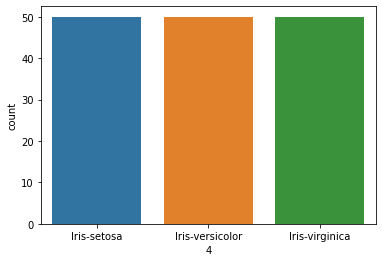

In [7]:
sns.countplot(x = dataset[4])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_iris(path):

  # 불러오기
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None, # 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       )  # 데이터 형식 : pandas의 데이터프레임
  dataset = dataset.values # 데이터 형식 : 넘파이 배열로 변환
  # x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # ( : 모든행, 첫번째부터 마지막 전까지의 열)
  y = dataset[:, -1] # ( : 모든행, 마지막열)

  # 정규화(속셩별로 데이터의 스케일을 조정) -  x데이터에만 해준다
  scaler = StandardScaler()
  x = dataset = scaler.fit_transform(x)

  # 원한 인코딩: y {[1,0,0], [0,1,0], [0,0,1]}
  onehot = OneHotEncoder(sparse=False)
  y = onehot.fit_transform(np.expand_dims(y,1)) # y(샘플개수, ) ->행렬 (샘플개수, 1)
  print(onehot.categories_)
  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3)
  
  return x_train, x_test, y_train, y_test
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test, y_train, y_test = path2dataset_iris(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x : {x_train[0]}')
print(f'첫번째 샘플 y : {y_train[0]}')

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫번째 샘플 x : [ 2.24968346 -1.05056946  1.78634131  1.44795564]
첫번째 샘플 y : [0. 0. 1.]


In [ ]:
A, B, C  D, 네개의 클래스를 구분하는 문제
# 라벨링
A -> 0
B -> 1
C -> 2
D -> 3

# 원-핫 인코딩
A -> [1,0,0,0]
B -> [0,1,0,0]
C -> [0,0,1, 0]
D -> [0,0,0,1]

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import numpy as np
tf.__version__


'2.8.2'

In [15]:
def build_model():
  x = layers.Input(shape = (4))
  y = layers.Dense(30, activation = 'relu')(x) #아웃풋 shape
  y = layers.Dense(10, activation = 'relu')(y)
  y = layers.Dense(3, activation = 'softmax')(y)
  model = models.Model(x, y) # 이진분류 문제 경우, 마지막 레이어에서 sigmoid 사용
 
  return model

model = build_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 30)                150       
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 분류 문제는 기본적으로 crossentropy
* 이진분류 : binary_crossentropy
* 다중분류 : categorical_crossentropy
* `optimizer` : 
* `metrics`: 


In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [17]:
model.fit(x_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
11/11 [==============================] - 3s 3ms/step - loss: 1.0217 - accuracy: 0.4667
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9269 - accuracy: 0.5619
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.5905
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.5714
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7244 - accuracy: 0.5714
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6667
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7714
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7810
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.8190
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.8381
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [18]:
model.evaluate(x_test, y_test) # 과적합(overfitting) 일어났다.

2/2 [==============================] - 0s 10ms/step - loss: 0.1002 - accuracy: 0.9556


[0.10022873431444168, 0.9555555582046509]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [25]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis = 1) # 세개의 클래스 중 가장 큰 값 인덱스
y_pred_argmax = np.argmax(y_pred, axis = 1) # 세개의 클래스 중 가장 큰 값 인덱스
for i in range(10):
  print(f' {i}번째실제y : {y_test[i]}-{y_test_argmax[i]}, 예측 y : {y_pred_argmax[i]}')

(45, 3) (45, 3)
 0번째실제y : [1. 0. 0.]-0, 예측 y : 0
 1번째실제y : [0. 1. 0.]-1, 예측 y : 1
 2번째실제y : [0. 1. 0.]-1, 예측 y : 1
 3번째실제y : [1. 0. 0.]-0, 예측 y : 0
 4번째실제y : [0. 0. 1.]-2, 예측 y : 2
 5번째실제y : [0. 1. 0.]-1, 예측 y : 1
 6번째실제y : [0. 0. 1.]-2, 예측 y : 2
 7번째실제y : [1. 0. 0.]-0, 예측 y : 0
 8번째실제y : [1. 0. 0.]-0, 예측 y : 0
 9번째실제y : [0. 0. 1.]-2, 예측 y : 2


* 예측 시각화

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


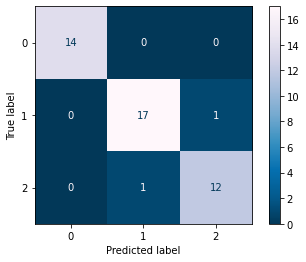

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test_argmax, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'PuBu_r')

## 과제
---

### | 과제1. 다중분류 문제 정리

* 예측값의 범위 : 0~1
* 예측값의 shape : (샘플 수, 클래스 갯수 ) 
* 아웃풋 레이어의 노드 개수 : 클래스 갯수
* 아웃풋 레이어의 activation : softmax
* 손실함수 (loss) : categorical_crossentropy
* 평가함수 (metrics) : accuracy(정확도)

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

In [27]:
def build_model():
  x = layers.Input(shape = (4))
  y = layers.Dense(30, activation = 'relu')(x) #아웃풋 shape
  y = layers.Dense(10, activation = 'relu')(y)
  y = layers.Dense(7, activation = 'relu')(y)
  y = layers.Dense(3, activation = 'softmax')(y)
  model = models.Model(x, y) # 이진분류 문제 경우, 마지막 레이어에서 sigmoid 사용
 
  return model

model = build_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 30)                150       
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 7)                 77        
                                                                 
 dense_11 (Dense)            (None, 3)                 24        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [37]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#정규화 (x에 대해서만 정규화) 이미지 데이터 : 0~255 -> 0~1
x_train = x_train/255.0
x_test = x_test/255.0

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

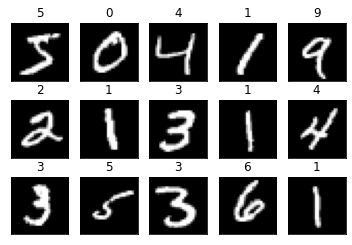

In [35]:
for i in range(15):
  img = x_train[i]
  label = y_train[i]
  plt.subplot(3,5, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(label)
  plt.xticks([]);plt.yticks([])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [67]:
from tensorflow.keras import models, layers, utils
# 4 -> 12 -> 8 -> 3

def build_model():
  x = layers.Input(shape = (28, 28))
  y = layers.Flatten()(x)
  # 중간층
  y = layers.Dense(50, activation = 'relu')(y)
  y = layers.Dense(30, activation = 'relu')(y)
  y = layers.Dense(20, activation = 'relu')(y)
  y = layers.Dense(15, activation = 'relu')(y)
  y = layers.Dense(13, activation = 'relu')(y)
  y = layers.Dense(10, activation = 'softmax')(y) # 마지막 레이어에서 softmax 사용
  model = models.Model(x, y) 
 
  return model

model = build_model()
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 50)                39250     
                                                                 
 dense_44 (Dense)            (None, 30)                1530      
                                                                 
 dense_45 (Dense)            (None, 20)                620       
                                                                 
 dense_46 (Dense)            (None, 15)                315       
                                                                 
 dense_47 (Dense)            (None, 13)                208

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [68]:
model = build_model()
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 50)                39250     
                                                                 
 dense_50 (Dense)            (None, 30)                1530      
                                                                 
 dense_51 (Dense)            (None, 20)                620       
                                                                 
 dense_52 (Dense)            (None, 15)                315       
                                                                 
 dense_53 (Dense)            (None, 13)                208

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : \
  *sparse_categorical_crossentropy : 원하는 인코딩을 안했을 때 사용가능
* `optimizer` : 
* `metrics`: 


In [69]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [70]:
model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3780 - accuracy: 0.8861
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1639 - accuracy: 0.9524
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1251 - accuracy: 0.9625
Epoch 4/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1044 - accuracy: 0.9687
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0893 - accuracy: 0.9737
Epoch 6/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0780 - accuracy: 0.9768
Epoch 7/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0682 - accuracy: 0.9793
Epoch 8/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0623 - accuracy: 0.9814
Epoch 9/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 10/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.05

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [71]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9729


[0.10076197236776352, 0.9728999733924866]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [72]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)
y_pred_argmax = np.argmax(y_pred, axis = 1) # 세개의 클래스 중 가장 큰 값 인덱스
for i in range(10):
  print(f' {i}번째실제y : {y_test[i]}-{y_test_argmax[i]}, 예측 y : {y_pred_argmax[i]}')

(10000,) (10000, 10)
 0번째실제y : 7-0, 예측 y : 7
 1번째실제y : 2-1, 예측 y : 2
 2번째실제y : 1-1, 예측 y : 1
 3번째실제y : 0-0, 예측 y : 0
 4번째실제y : 4-2, 예측 y : 4
 5번째실제y : 1-1, 예측 y : 1
 6번째실제y : 4-2, 예측 y : 4
 7번째실제y : 9-0, 예측 y : 9
 8번째실제y : 5-0, 예측 y : 5
 9번째실제y : 9-2, 예측 y : 9


* 예측 시각화

[[ 966    1    1    1    0    1    4    1    4    1]
 [   0 1126    2    1    0    0    1    2    3    0]
 [   7    1 1001    4    2    0    2    6    8    1]
 [   0    0    5  992    0    5    0    4    4    0]
 [   3    0    3    0  955    0    5    2    1   13]
 [   4    0    2   19    0  857    3    1    4    2]
 [   5    2    2    0    4    6  935    1    3    0]
 [   2    3    8    8    0    0    0  999    2    6]
 [   3    1   10    6    0    5    2    3  942    2]
 [   2    4    0    9   12   15    1    9    1  956]]


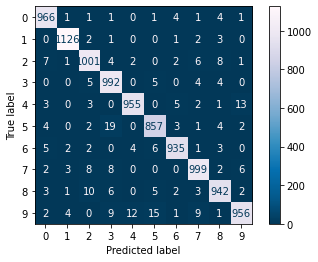

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 혼돈 행렬
cm = confusion_matrix(y_test, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap = 'PuBu_r')

* 모델 활용

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0, flags=flags)


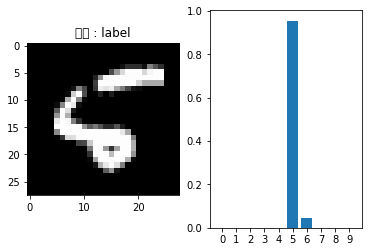

In [84]:
idx = 8 # n번째 샘플
img = x_test[idx]
label = y_test[idx]
pred = y_pred[idx] # [0.1,0.7,0.2 ...]
pred_argmax = y_pred_argmax[idx] # 1
plt.subplot(121);plt.imshow(img, cmap ='gray');plt.title(f'정답 : label')
plt.subplot(122);plt.bar(range(10), pred);plt.xticks(range(10))
plt.show()